In [1]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
tf.__version__

'2.1.0'

## Loading the dataset
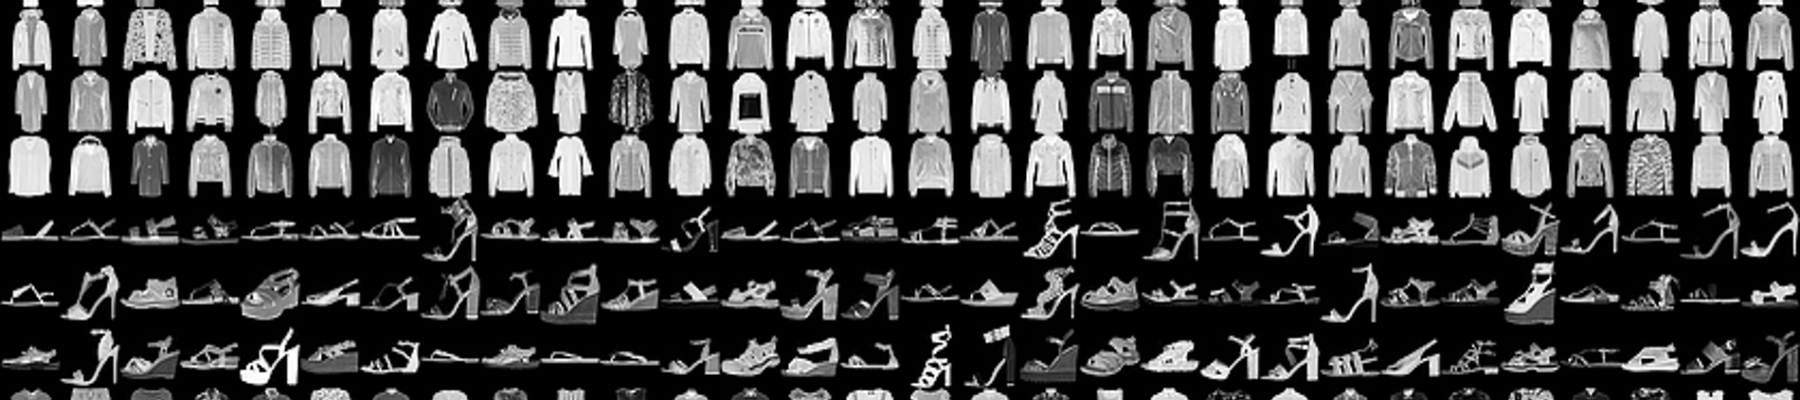

In [3]:
#Loading the Fashion Mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Image normalization
We devide each image in the training and testing dataset with the maxiumum number of pixels (255).

In this way each pixel will be in the rainge [0, 1]. By normalizing imaes we are making sure that our model (ANN) trains faster.

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Reshaping of the dataset
Since we are using fully connected network, we reshape the training and testing subsets to be in the vector format.

In [5]:
#Since each image is 28x28, we simply use reshape the full dataset to [-1 (all elements), height * width]
X_train = X_train.reshape(-1, 28*28)

In [6]:
#Reshape the testing subset in the same way
X_test = X_test.reshape(-1, 28*28)

# Building an Artificial Neural network

In [7]:
model = tf.keras.models.Sequential()

Adding the first layer (Dense layer)\
Layer hyper-parameters:

number of units/neurons: 128\
activation function: ReLU\
input_shape: (784, )


In [8]:
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(784, )))

### Adding a Dropout layer 

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. In this way, while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [9]:
model.add(tf.keras.layers.Dropout(0.2))

#### (My Addition)

In [10]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

Adding the second layer (output layer)\
units == number of classes (10 in the case of Fashion MNIST)\
activation = 'softmax'

In [11]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Comiling the model\
Optimizer: Adam\
Loss: Sparse softmax (categorical) crossentropy

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [14]:
model.fit(X_train, y_train, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5576 - sparse_categorical_accuracy: 0.8006
Epoch 2/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4202 - sparse_categorical_accuracy: 0.8457
Epoch 3/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3856 - sparse_categorical_accuracy: 0.8597
Epoch 4/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3637 - sparse_categorical_accuracy: 0.8675
Epoch 5/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3482 - sparse_categorical_accuracy: 0.8716
Epoch 6/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3362 - sparse_categorical_accuracy: 0.8769
Epoch 7/15
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3282 - sparse_categorical_accuracy: 0.8785
Epoch 8/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3173 - spars

In [16]:
#Model evaluation and prediction
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3293 - sparse_categorical_accuracy: 0.8800


In [17]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8799999952316284


### Saving the model

In [16]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [17]:
model.save_weights("fashion_model.h5")